In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"trayharoun","key":"e6989c8bbfd23f1adf81ba878e7f91ce"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia


Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other


In [ ]:
!unzip chest-xray-pneumonia.zip -d .


Streaming output truncated to the last 5000 lines.
  inflating: ./chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: ./chest_xray/train/NORMAL/

In [ ]:
!ls chest_xray

chest_xray  __MACOSX  test  train  val


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout



In [ ]:
# Load VGG16 without top layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the convolutional base
for layer in base_model.layers:
    layer.trainable = False

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Paths
base_path = "/content/chest_xray"
train_path = os.path.join(base_path, "train")
val_path = os.path.join(base_path, "val")
test_path = os.path.join(base_path, "test")

# Image dimensions
img_height, img_width = 224, 224
batch_size = 32

# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True
)

# Validation and test: only rescale
val_test_datagen = ImageDataGenerator(rescale=1./255)

# Generators
train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

val_gen = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary'
)

test_gen = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
base_model = VGG16(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3)
)

# Freeze all layers
for layer in base_model.layers:
    layer.trainable = False


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(1, activation='sigmoid')(x)

vgg_model = Model(inputs=base_model.input, outputs=predictions)


In [ ]:
vgg_model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_vgg = vgg_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=10
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 122s 672ms/step - accuracy: 0.7910 - loss: 0.4561 - val_accuracy: 0.6250 - val_loss: 0.7533
Epoch 2/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 637ms/step - accuracy: 0.9030 - loss: 0.2507 - val_accuracy: 0.7500 - val_loss: 0.6169
Epoch 3/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 143s 646ms/step - accuracy: 0.9145 - loss: 0.2095 - val_accuracy: 0.7500 - val_loss: 0.6172
Epoch 4/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 139s 630ms/step - accuracy: 0.9261 - loss: 0.1952 - val_accuracy: 0.7500 - val_loss: 0.7250
Epoch 5/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 634ms/step - accuracy: 0.9217 - loss: 0.1919 - val_accuracy: 0.7500 - val_loss: 0.5622
Epoch 6/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 619ms/step - accuracy: 0.9356 - loss: 0.1674 - val_accuracy: 0.7500 - val_loss: 0.4352
Epoch 7/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 101s 617ms/step - accuracy: 0.9306 - loss: 0.1782 - val_accuracy: 0.7500 - val_loss: 0.3829
Epoch 8/10
163/163 ━━━━━━━━━━━━━━━━━━━━ 100s 613ms/step - accuracy: 0.9275 -

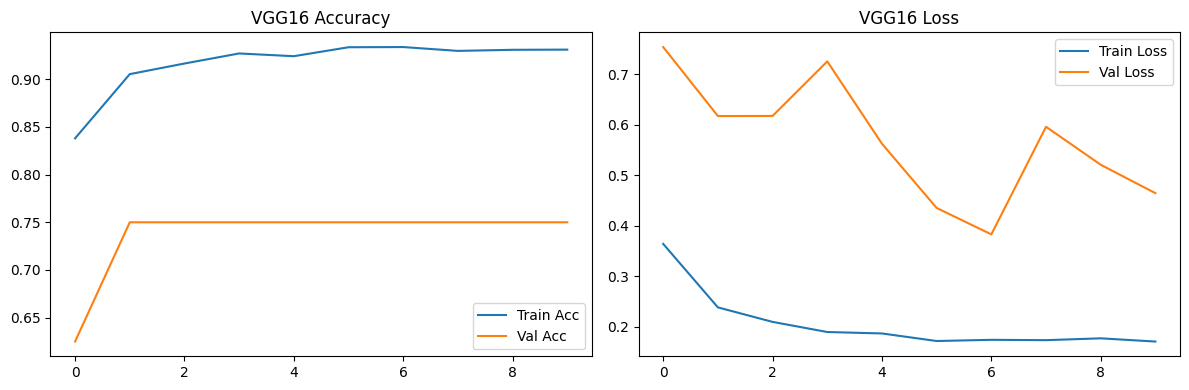

In [ ]:
acc = history_vgg.history['accuracy']
val_acc = history_vgg.history['val_accuracy']
loss = history_vgg.history['loss']
val_loss = history_vgg.history['val_loss']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.legend()
plt.title('VGG16 Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.title('VGG16 Loss')

plt.tight_layout()
plt.show()


In [ ]:

#download it :
from google.colab import files
vgg_model.save("vgg16_pneumoscan.keras")
#switch it to drive :
from google.colab import drive
drive.mount('/content/drive')
!cp vgg16_pneumoscan.keras /content/drive/MyDrive/PneumoScan/


Mounted at /content/drive


In [ ]:
# Unfreeze the last 4 layers of the base model
for layer in base_model.layers[-4:]:
    layer.trainable = True


In [ ]:
from tensorflow.keras.optimizers import Adam

# Recompile with a lower learning rate
vgg_model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
history_finetune = vgg_model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


Epoch 1/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 109s 628ms/step - accuracy: 0.9313 - loss: 0.1755 - val_accuracy: 0.8125 - val_loss: 0.3497
Epoch 2/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 103s 631ms/step - accuracy: 0.9616 - loss: 0.1061 - val_accuracy: 0.8125 - val_loss: 0.3406
Epoch 3/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 142s 630ms/step - accuracy: 0.9581 - loss: 0.1047 - val_accuracy: 0.9375 - val_loss: 0.1585
Epoch 4/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 104s 634ms/step - accuracy: 0.9687 - loss: 0.0866 - val_accuracy: 0.7500 - val_loss: 0.2730
Epoch 5/5
163/163 ━━━━━━━━━━━━━━━━━━━━ 105s 643ms/step - accuracy: 0.9696 - loss: 0.0755 - val_accuracy: 0.8125 - val_loss: 0.2864


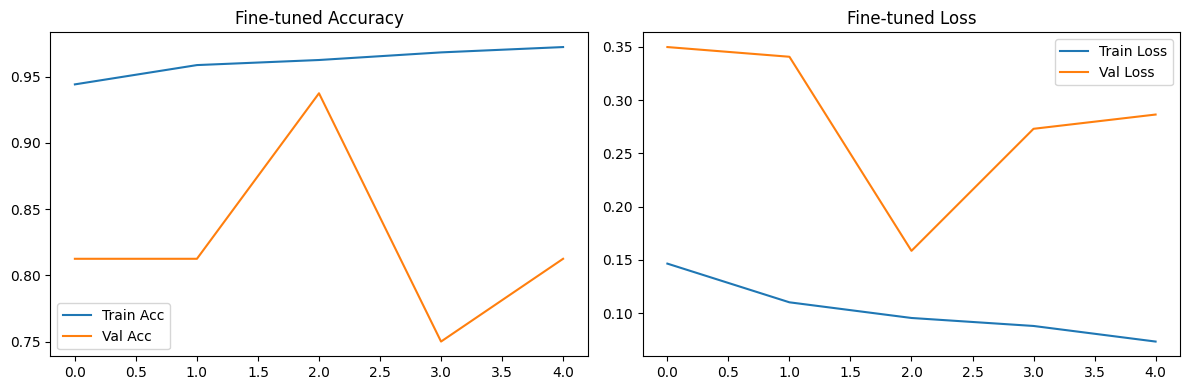

In [ ]:
acc = history_finetune.history['accuracy']
val_acc = history_finetune.history['val_accuracy']
loss = history_finetune.history['loss']
val_loss = history_finetune.history['val_loss']

plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(acc, label='Train Acc')
plt.plot(val_acc, label='Val Acc')
plt.legend()
plt.title('Fine-tuned Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loss, label='Train Loss')
plt.plot(val_loss, label='Val Loss')
plt.legend()
plt.title('Fine-tuned Loss')

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
vgg_model.save("vgg16_finetuned_pneumoscan.keras")
!cp vgg16_finetuned_pneumoscan.keras /content/drive/MyDrive/PneumoScan/


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
